<div class="alert alert-block alert-info">

<h1 id="important-information">Important Information</h1>

- All formatting in this document has been applied manually.  
- The formatting style is based on the guidelines from:  
  <a href="https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet" target="_blank">
  IBM Jupyter Markdown Cheatsheet
  </a>
- This document will include topics such as:
    - A brief description of AI usage.
    - A 300-500-word log describing the compulsory work and my experience.
    - A link to my public GitHub repository and streamlit app
    - A Table of contents with links to the place in the document

- My GitHub repository: [My GitHub Repository](https://github.com/JoeriH06/IND320)
- My Streamlit app: [My streamlit App]()
</div>


<div class="alert alert-block alert-success">

<h1 id="TOC"> Table Of Contents</h1>

- [Important Information](#important-information)
- [Compulsory Introduction](#compulsory-intro)  
- [AI usage](#AI-usage)
- [My takeaway](#takeaway)        

</div>


<div class="alert alert-block">
<h1 id="compulsory-intro"> Compulsory Introduction </h1>

*Compulsory assignment 1:*

This compulsory assignment consists of the following sub-assignments
***
**GitHub & Notebook Tasks:** <br>
* connecting your personal GitHub account with your streamlit account, and making a minimum working example of a streamlit app.
* Making a Jupiter notebook which should be able to:
    * Read the supplied CSV file using Pandas.
    * Print its contents in a relevant way.
    * Plot each column separatelty.
    * Plot all columns together. Consider how to make this natural, given that the scales are different.
* The Jupyter Notebook should also contain a short description about AI usage, and a description about the compulsory assignment in hand.
***
**Streamlit Tasks:** <br>
* we must create a working streamlit application consisting of four pages. These pages should contain dummy headers and text for now which will be updated in a later stadium. 

* *Front page:*
    The front/home page should have a working sidebar with navigation options to other pages.
* *Second page:*
    The second page should contain the imported data shown in a well structured table. There should be one row in the table for each column of the imported data. Also, we have to make use of the row-wise LineChartColumn() function, to display the first month of the data series.
* *Third page:*
    On the third page we plot a plot of the imported data, this plot will contain the right the syntaxes (header, axis titles, etc.). We will also show a drop-down menu where you can choose any single column in the CSV or all of the columns together. Lastly, we will show a selection slider to select a subset of the months, with a default month of the first month.
* *Data:*
    All data should be read from a local CSV-file, using caching for app speed.

</div>

<div class="alert alert-block">
<h1 id="ai-usage">AI usage </h1>
<p>
Write about AI usage
</p>
</div>

<div class="alert alert-block">
<h1 id="takeaway"> My takeaway </h1>

Must include a 300-500-word log describing the compulsory work (including both Jupyter Notebook and Streamlit experience).

</div>

# Code for Jupyter Notebook and the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB
None


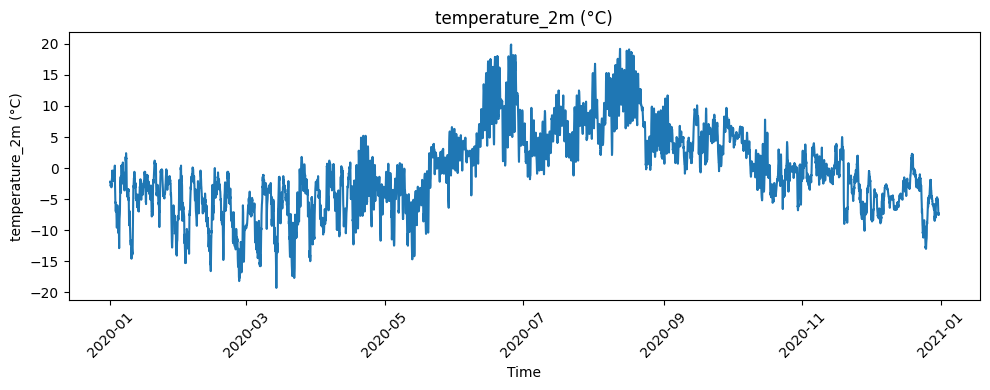

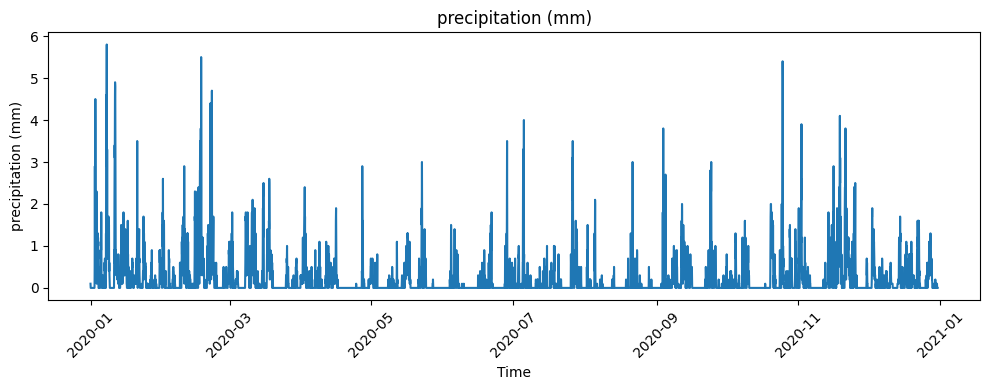

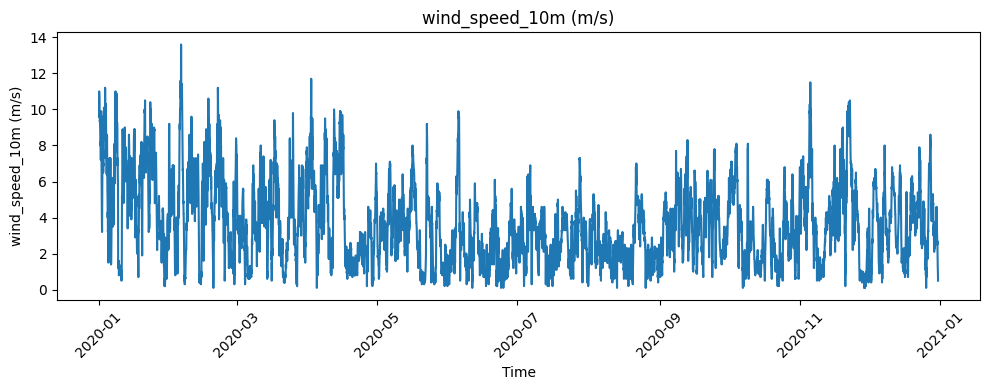

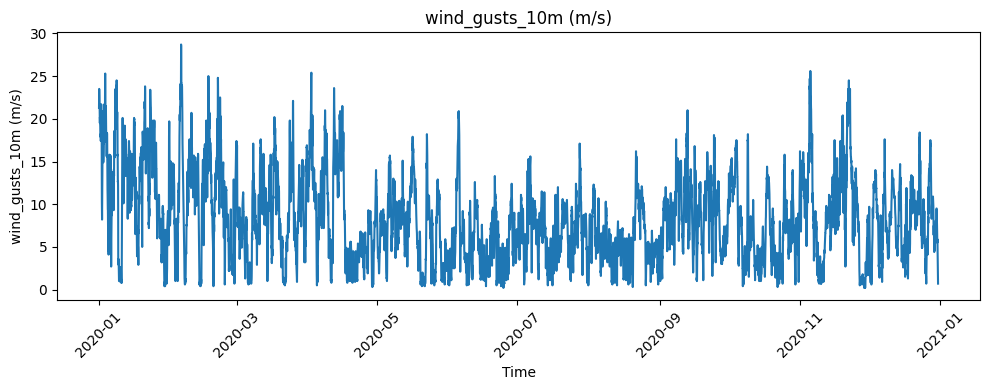

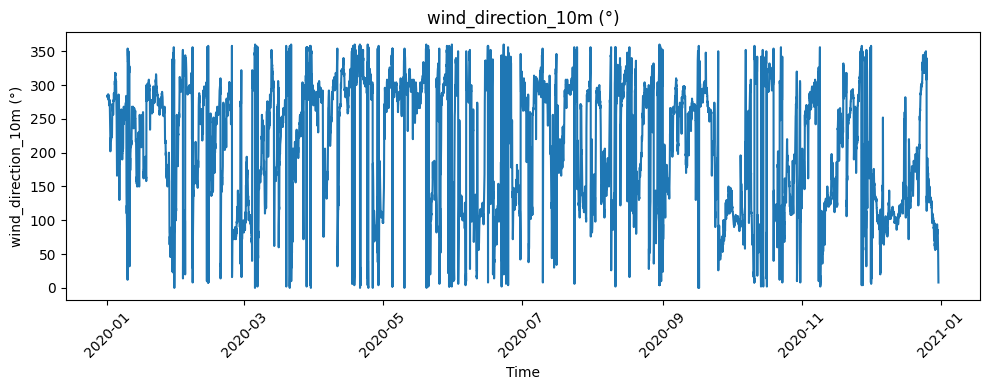

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Read the supplied CSV file using pandas
# we get the data file and load it into a Pandas dataframe, then we print the first few rows to verify it loaded correctly.
data = pd.read_csv('Data/open-meteo-subset.csv')
#print(data.head())

# Task 2: Print the content in a relevant way
# we print the column names and data types to understand the structure of the dataset provided.
print(data.info())

# Task 3: Plot each column separately
# We will plot each column separately to visualize the data using matplotlib.
# Convert time column to datetime
data["time"] = pd.to_datetime(data["time"])

# Plot each numeric column against time
for column in data.columns:
    # we will add this if statement otherwise you get a graph with time vs time.
    if column != "time":
        plt.figure(figsize=(10, 4))
        plt.plot(data["time"], data[column])
        plt.title(column)
        plt.xlabel("Time")
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

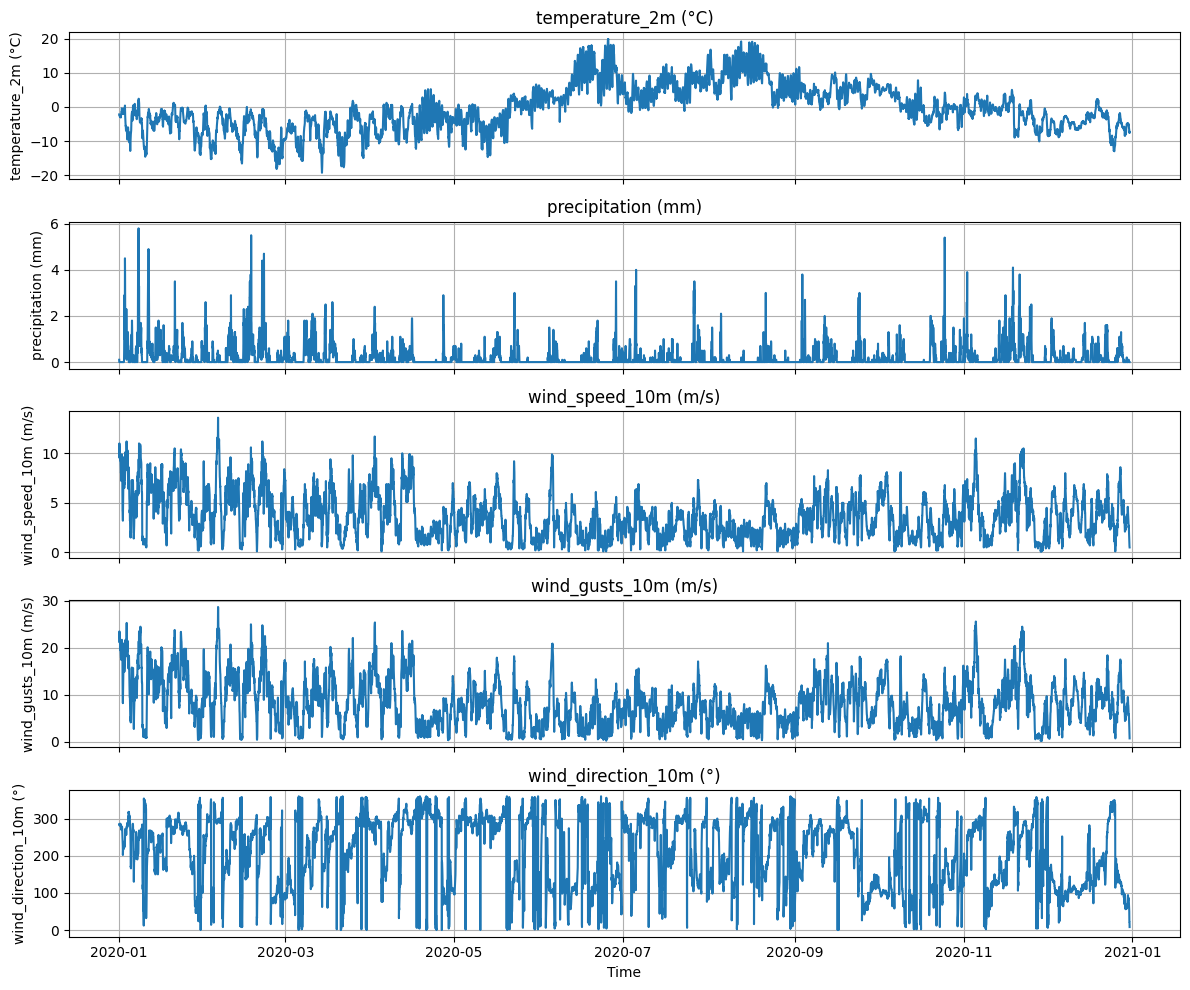

In [18]:
# Task 4:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# Create subplots, total of 6 columns -1 because we dont need the time plot. so, 5 plots (1) column
fig, axes = plt.subplots(len(data.columns) - 1, 1, figsize=(12, 10), sharex=True)

# we use zip to combine each axis with corrosponding column
for ax, column in zip(axes, data.columns[1:]):
    ax.plot(data["time"], data[column])
    ax.set_title(column)
    ax.set_ylabel(column)
    ax.grid(True)

# We give only the last axes the lable time, this is for visability and usability
axes[-1].set_xlabel("Time")
plt.tight_layout()
plt.show()
